In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Activation
from keras.wrappers.scikit_learn import KerasClassifier

**DATA EXPLORER**

In [2]:
df = pd.read_csv("c:/Users/maria/Downloads/NASA 1 year.csv")
df

,Timestamp,Time,Source,Bt-med,Bt-min,Bt-max,Bx-med,Bx-min,Bx-max,By-med,...,Theta-max,Dens-med,Dens-min,Dens-max,Speed-med,Speed-min,Speed-max,Temp-med,Temp-min,Temp-max
0,1/1/2023,0:00:00,1,4.92,4.53,5.82,-3.57,-4.75,1.81,1.62,...,43.43,11.96,10.26,15.51,557.0,545.0,605.2,542991,453029,754507
1,1/1/2023,6:00:00,1,4.82,4.56,5.16,-3.48,-4.85,1.17,1.69,...,56.06,11.09,9.85,12.38,548.3,519.3,576.7,464296,320332,616560
2,1/1/2023,12:00:00,1,4.71,4.21,5.15,-2.64,-4.65,2.49,3.06,...,29.51,9.99,9.48,12.29,532.7,512.3,562.4,322532,300925,516750
3,1/1/2023,18:00:00,1,4.84,3.49,5.41,-1.10,-4.68,2.61,2.46,...,38.02,9.44,7.50,11.71,527.2,489.4,542.0,314963,221218,477518
4,1/2/2023,0:00:00,1,4.48,3.97,5.21,-2.50,-4.13,2.68,2.67,...,56.88,8.96,7.03,11.28,508.1,486.7,536.1,293298,199120,473128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1103,10/3/2023,18:00:00,1,7.72,6.74,8.60,-6.30,-7.66,-3.91,4.18,...,19.17,4.13,1.68,6.16,393.8,313.6,469.3,117001,10151,212203
1104,10/4/2023,0:00:00,1,8.46,7.42,9.51,-5.74,-8.15,-0.40,6.02,...,17.68,2.27,0.74,4.78,392.8,326.0,437.3,121404,5000,225067
1105,10/4/2023,6:00:00,1,8.00,5.81,8.57,-4.35,-6.35,-0.20,5.08,...,22.81,3.05,1.81,6.98,404.0,374.0,477.1,169333,84621,500209
1106,10/4/2023,12:00:00,1,7.02,6.13,7.89,-1.32,-4.28,3.32,6.39,...,27.03,2.91,1.07,6.55,410.6,389.5,475.3,145439,63981,462712


In [3]:
df_kp = pd.read_csv('c:/Users/maria/Downloads/K-index data.csv')
df_kp

,Timestamp,Time,Unnamed: 2,Unnamed: 3,Unnamed: 4,Kp,Ap,Unnamed: 7,even_index
0,2023 01 01,0,1.5,33238.00,33238.0625,2.333,9,1,True
1,2023 01 01,6,7.5,33238.25,33238.3125,2.000,7,1,True
2,2023 01 01,12,13.5,33238.50,33238.5625,1.667,6,1,True
3,2023 01 01,18,19.5,33238.75,33238.8125,3.667,22,1,True
4,2023 01 02,0,1.5,33239.00,33239.0625,2.000,7,1,True
...,...,...,...,...,...,...,...,...,...
1103,2023 10 03,18,19.5,33513.75,33513.8125,2.000,7,0,True
1104,2023 10 04,0,1.5,33514.00,33514.0625,3.000,15,0,True
1105,2023 10 04,6,7.5,33514.25,33514.3125,2.333,9,0,True
1106,2023 10 04,12,13.5,33514.50,33514.5625,1.667,6,0,True


In [4]:
print(df.shape)
print(df_kp.shape)

(1108, 30)
(1108, 9)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1108 entries, 0 to 1107
Data columns (total 30 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Timestamp  1108 non-null   object 
 1   Time       1108 non-null   object 
 2   Source     1108 non-null   int64  
 3   Bt-med     1108 non-null   float64
 4   Bt-min     1108 non-null   float64
 5   Bt-max     1108 non-null   float64
 6   Bx-med     1108 non-null   float64
 7   Bx-min     1108 non-null   float64
 8   Bx-max     1108 non-null   float64
 9   By-med     1108 non-null   float64
 10  By-min     1108 non-null   float64
 11  By-max     1108 non-null   float64
 12  Bz-med     1108 non-null   float64
 13  Bz-min     1108 non-null   float64
 14  Bz-max     1108 non-null   float64
 15  Phi-mean   1108 non-null   float64
 16  Phi-min    1108 non-null   float64
 17  Phi-max    1108 non-null   float64
 18  Theta-med  1108 non-null   float64
 19  Theta-min  1108 non-null   float64
 20  Theta-ma

In [6]:
df_kp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1108 entries, 0 to 1107
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Timestamp   1108 non-null   object 
 1   Time        1108 non-null   int64  
 2   Unnamed: 2  1108 non-null   float64
 3   Unnamed: 3  1108 non-null   float64
 4   Unnamed: 4  1108 non-null   float64
 5   Kp          1108 non-null   float64
 6   Ap          1108 non-null   int64  
 7   Unnamed: 7  1108 non-null   int64  
 8   even_index  1108 non-null   bool   
dtypes: bool(1), float64(4), int64(3), object(1)
memory usage: 70.5+ KB


**DATA CLEANING AND PREPARATION**

In [7]:
df_kp.drop(['Unnamed: 2'],axis=1,inplace=True)
df_kp.drop(['Unnamed: 3'],axis=1,inplace=True)
df_kp.drop(['Unnamed: 4'],axis=1,inplace=True)
df_kp.drop(['Unnamed: 7'],axis=1,inplace=True)
df_kp

,Timestamp,Time,Kp,Ap,even_index
0,2023 01 01,0,2.333,9,True
1,2023 01 01,6,2.000,7,True
2,2023 01 01,12,1.667,6,True
3,2023 01 01,18,3.667,22,True
4,2023 01 02,0,2.000,7,True
...,...,...,...,...,...
1103,2023 10 03,18,2.000,7,True
1104,2023 10 04,0,3.000,15,True
1105,2023 10 04,6,2.333,9,True
1106,2023 10 04,12,1.667,6,True


In [8]:
df.isnull().sum()

Timestamp    0
Time         0
Source       0
Bt-med       0
Bt-min       0
Bt-max       0
Bx-med       0
Bx-min       0
Bx-max       0
By-med       0
By-min       0
By-max       0
Bz-med       0
Bz-min       0
Bz-max       0
Phi-mean     0
Phi-min      0
Phi-max      0
Theta-med    0
Theta-min    0
Theta-max    0
Dens-med     0
Dens-min     0
Dens-max     0
Speed-med    0
Speed-min    0
Speed-max    0
Temp-med     0
Temp-min     0
Temp-max     0
dtype: int64

In [9]:
df_kp.isnull().sum()

Timestamp     0
Time          0
Kp            0
Ap            0
even_index    0
dtype: int64

In [10]:
df_kp.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1103    False
1104    False
1105    False
1106    False
1107    False
Length: 1108, dtype: bool

In [11]:
data = df
data[['Ap','Kp']] = df_kp[['Ap','Kp']]
data.head()

,Timestamp,Time,Source,Bt-med,Bt-min,Bt-max,Bx-med,Bx-min,Bx-max,By-med,...,Dens-min,Dens-max,Speed-med,Speed-min,Speed-max,Temp-med,Temp-min,Temp-max,Ap,Kp
0,1/1/2023,0:00:00,1,4.92,4.53,5.82,-3.57,-4.75,1.81,1.62,...,10.26,15.51,557.0,545.0,605.2,542991,453029,754507,9,2.333
1,1/1/2023,6:00:00,1,4.82,4.56,5.16,-3.48,-4.85,1.17,1.69,...,9.85,12.38,548.3,519.3,576.7,464296,320332,616560,7,2.000
2,1/1/2023,12:00:00,1,4.71,4.21,5.15,-2.64,-4.65,2.49,3.06,...,9.48,12.29,532.7,512.3,562.4,322532,300925,516750,6,1.667
3,1/1/2023,18:00:00,1,4.84,3.49,5.41,-1.10,-4.68,2.61,2.46,...,7.50,11.71,527.2,489.4,542.0,314963,221218,477518,22,3.667
4,1/2/2023,0:00:00,1,4.48,3.97,5.21,-2.50,-4.13,2.68,2.67,...,7.03,11.28,508.1,486.7,536.1,293298,199120,473128,7,2.000


**DATA ANALYSIS**

In [12]:
data.describe()

,Source,Bt-med,Bt-min,Bt-max,Bx-med,Bx-min,Bx-max,By-med,By-min,By-max,...,Dens-min,Dens-max,Speed-med,Speed-min,Speed-max,Temp-med,Temp-min,Temp-max,Ap,Kp
count,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,...,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1.108000e+03,1108.000000,1.108000e+03,1108.000000,1108.000000
mean,0.998195,-173.829350,-175.541977,-172.457879,-180.260866,-184.039675,-176.684233,-180.786173,-184.882987,-176.389305,...,-176.856733,-169.576796,265.974278,235.027076,300.955054,1.622780e+05,69297.582130,3.380935e+05,11.042419,2.025869
std,0.060084,4246.916048,4246.842839,4246.975038,4246.642889,4246.481880,4246.794863,4246.621208,4246.446584,4246.807973,...,4246.787163,4247.101295,4266.182906,4264.792553,4267.743731,1.496670e+05,78414.146887,2.668830e+05,15.071675,1.264301
min,-1.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,...,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-9.999900e+04,-99999.000000,-9.999900e+04,0.000000,0.000000
25%,1.000000,4.980000,3.645000,5.780000,-2.805000,-5.682500,1.840000,-3.180000,-6.212500,1.707500,...,1.130000,6.550000,400.000000,375.800000,429.925000,5.826825e+04,11251.750000,1.545115e+05,4.000000,1.000000
50%,1.000000,5.940000,4.690000,6.995000,0.740000,-3.755000,4.160000,-0.910000,-4.470000,4.165000,...,3.220000,9.610000,446.600000,415.800000,480.000000,1.206725e+05,46096.000000,2.770000e+05,7.000000,2.000000
75%,1.000000,7.492500,5.840000,9.142500,3.182500,-1.247500,5.730000,2.830000,-2.177500,5.945000,...,5.430000,13.102500,494.525000,467.050000,528.550000,2.240372e+05,103690.500000,4.484000e+05,12.000000,2.667000
max,1.000000,32.440000,28.460000,33.990000,10.920000,4.560000,28.070000,23.400000,15.190000,28.870000,...,16.380000,71.160000,660.500000,621.000000,704.500000,1.308885e+06,599020.000000,2.391534e+06,236.000000,8.333000


C:\Users\maria\AppData\Local\Temp\ipykernel_18304\489719642.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True,cmap='BrBG')


<AxesSubplot: >

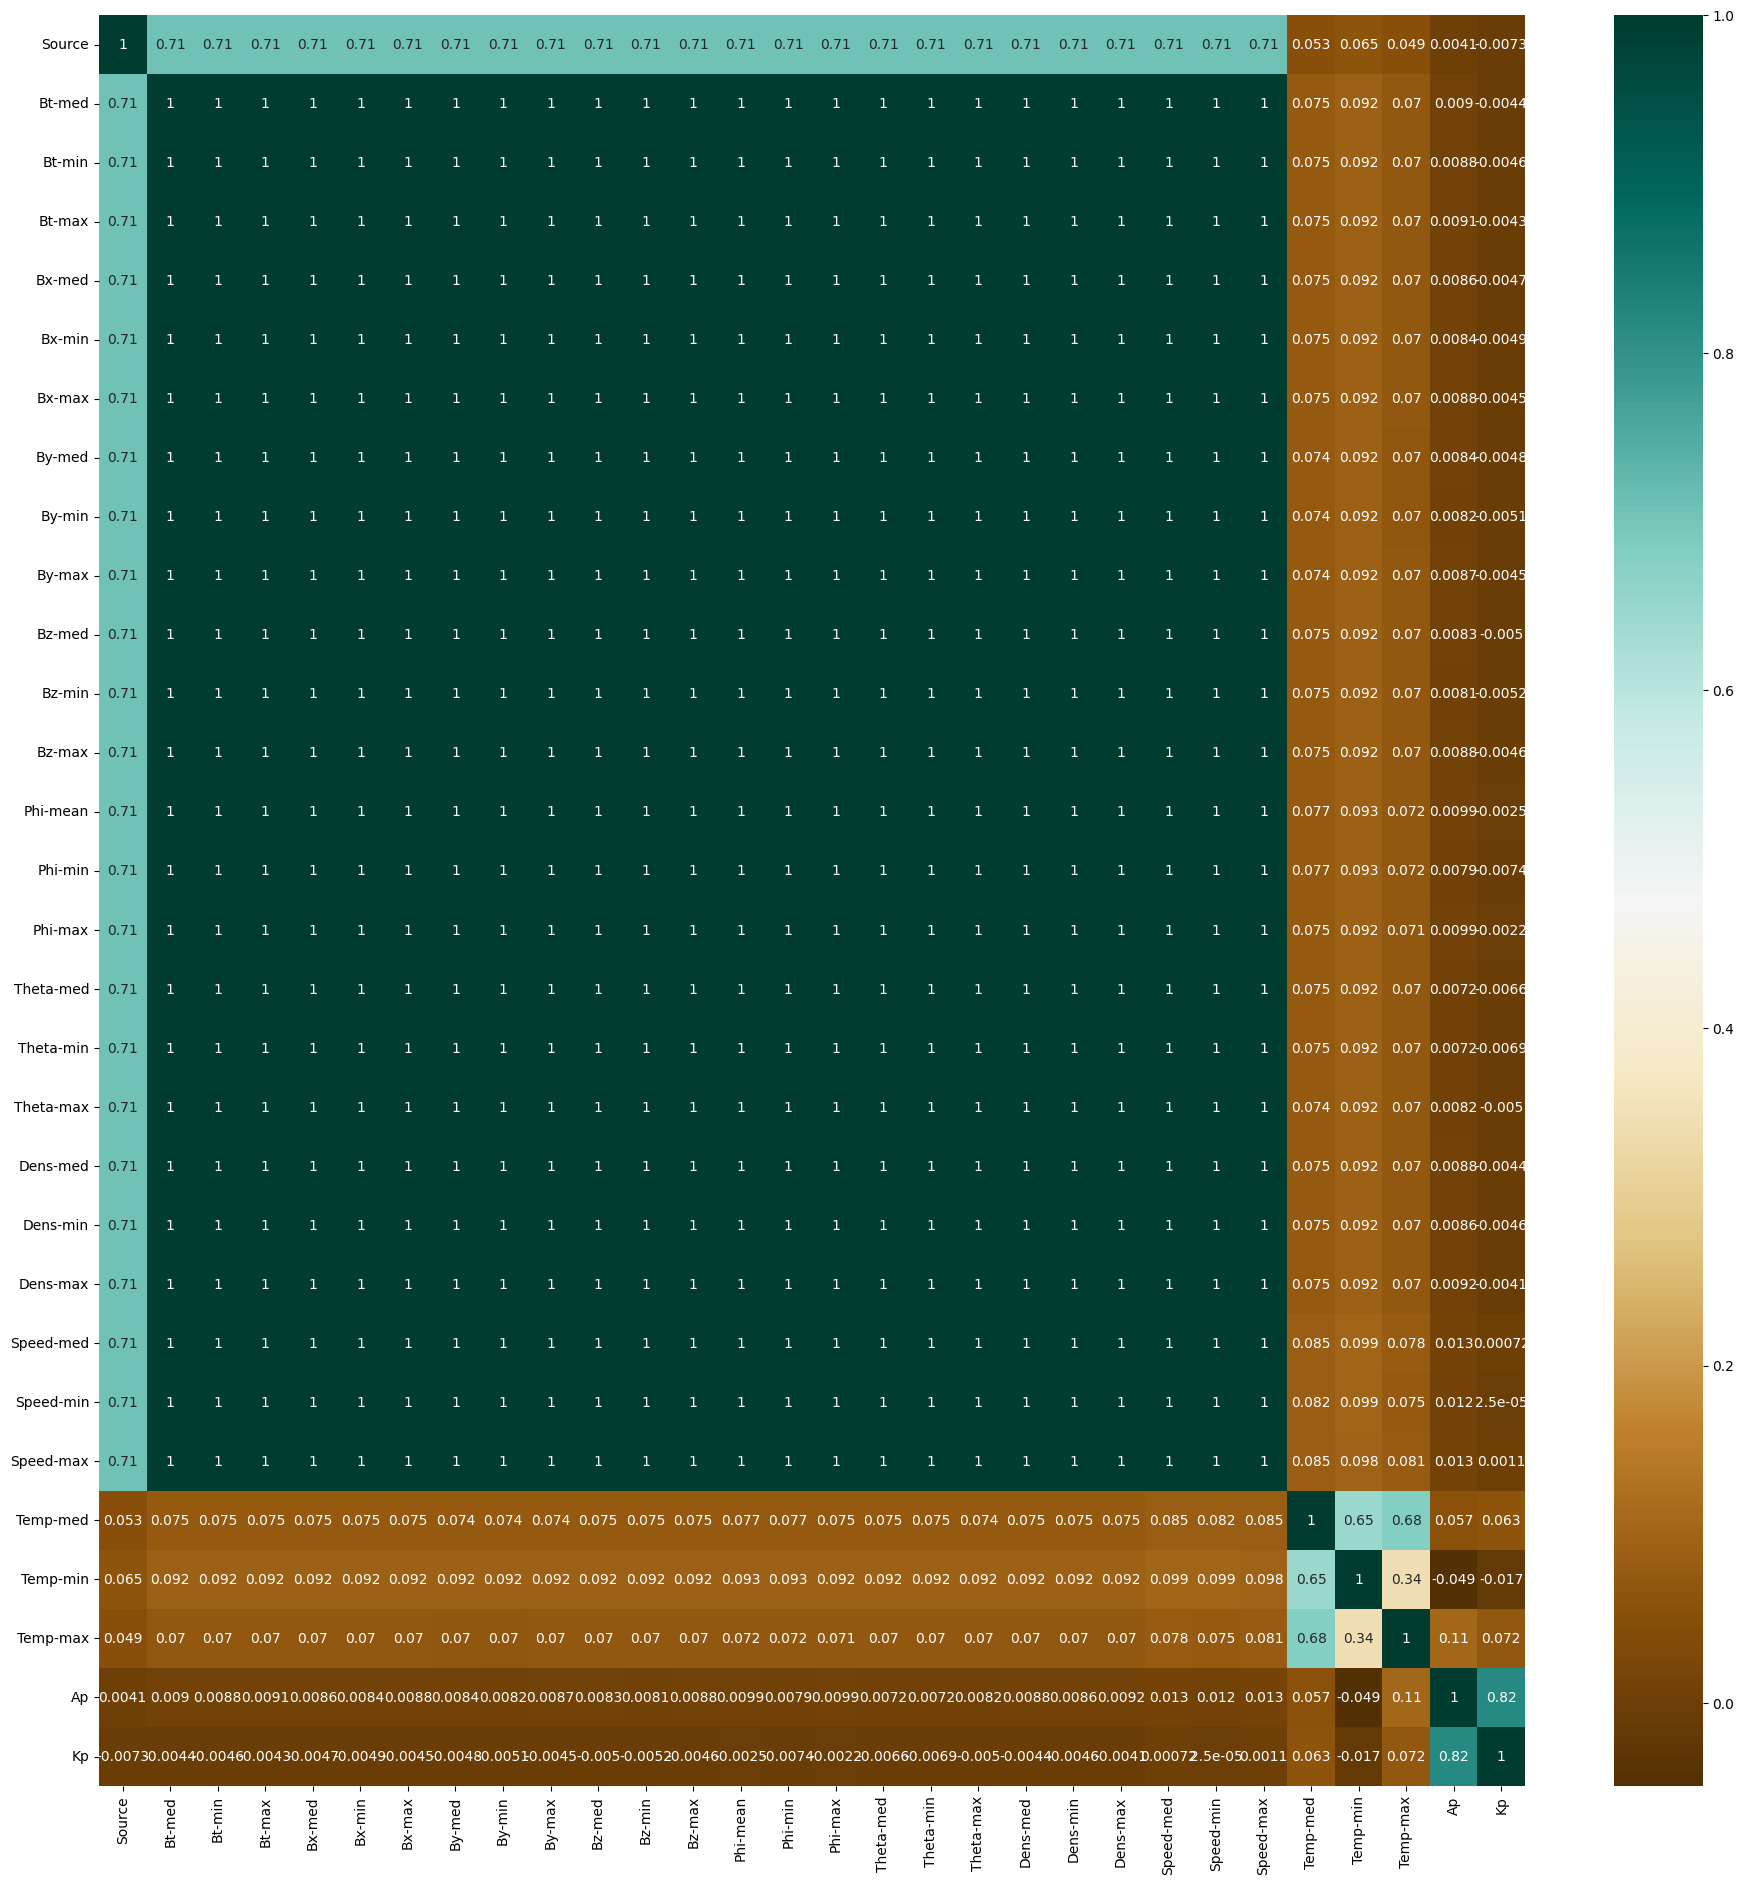

In [13]:
plt.figure(figsize=(23,23))
sns.heatmap(data.corr(),annot=True,cmap='BrBG')

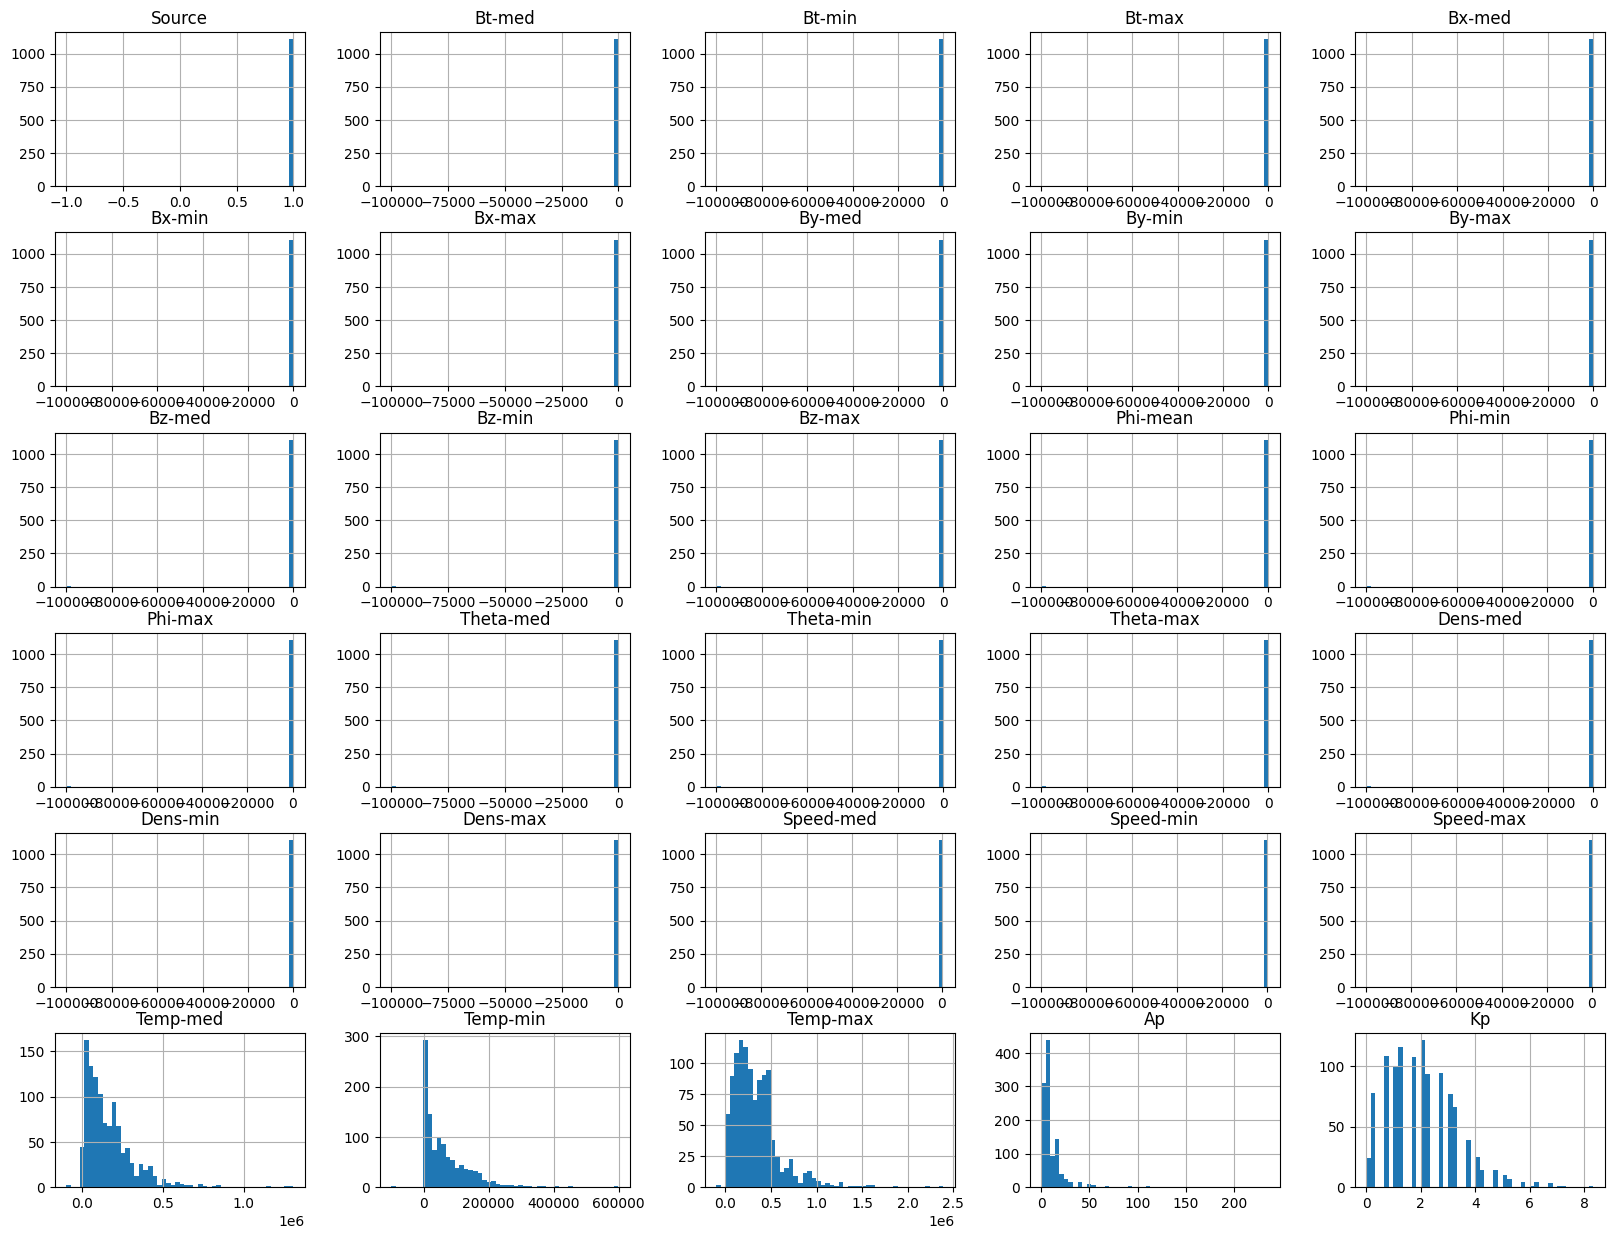

In [14]:
data.hist(bins=50, figsize=(20, 15))
plt.show()

In [15]:
X = data.iloc[:,0:31]
y = data['Kp']
X.shape

(1108, 31)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [17]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(886, 31)
(886,)
(222, 31)
(222,)


In [19]:
X_train.drop(['Timestamp'],axis=1,inplace=True)
X_train.drop(['Time'],axis=1,inplace=True)
X.drop(['Timestamp'],axis=1,inplace=True)
X.drop(['Time'],axis=1,inplace=True)

In [21]:
X_test.drop(['Timestamp'],axis=1,inplace=True)
X_test.drop(['Time'],axis=1,inplace=True)

In [31]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X) 
# Create ANN model
model = MLPRegressor(
    hidden_layer_sizes=(8, 3), 
    activation='relu',
    solver='adam', 
    alpha=1e-5,
    max_iter=1000)

model.fit(X_train, y_train)  
y_pred = model.predict(X_test)
score = model.score(X_test, y_test)
print('R^2 score:', score)

# Save the trained model
filename = 'ann_model.sav'

R^2 score: -0.9803044578581703
